<h1 align="center"><font color="yellow">Crie aplicativos de pesquisa semântica usando o banco de dados vetorial de código aberto ChromaDB</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [chroma](https://docs.trychroma.com/)

<font color="orange">Aqui aprenderemos a usar o ChromaDB para um aplicativo de pesquisa semântica.</font>

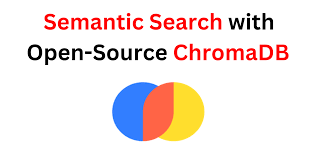

# Contextualizando

A `IA generativa` deu grandes avanços no ano passado. Desde o lançamento do modelo de geração de imagens `DALL-E 2`, muitos modelos de IA como `GPT-3.5`, `GPT-4` e modelos de código aberto se tornaram o assunto da cidade na comunidade de IA e além. Com o surgimento de aplicações e casos de uso de IA, tem havido um fluxo crescente de várias ferramentas e tecnologias para facilitar tais aplicações de IA e permitir que os desenvolvedores de IA criem aplicações do mundo real.

Entre essas ferramentas, hoje aprenderemos sobre o funcionamento e funções do `ChromaDB`, um `DB vetorial` de código aberto para armazenar `Embeddings` de modelos de `IA` como `GPT3.5`, `GPT-4` ou qualquer outro modelo de sistema operacional. Os `Embeddings` são um componente crucial de qualquer pipeline de aplicação de IA. Como os computadores processam apenas vetores, todos os dados devem ser vetorizados na forma de embeddings para serem utilizados nas aplicações. mergulhe profundamente no funcionamento do `ChromDB` com exemplos de código práticos!

Índice:

* Fundamentos do `ChromaDB` e instalação da biblioteca

* Funções e funcionamento do ChromaDB

* Aplicativo de `pesquisa semântica` com documentos de amostra

* `Embeddings` suportadas no `ChromaDB`

* Conclusão

* Perguntas frequentes (`FAQs`)

# <font color="red">Fundamentos do `ChromaDB` e instalação da biblioteca</font>

<font color="orange">`ChromaDB` é um banco de dados vetorial de código aberto projetado para armazenar `Embeddings` de vetores para desenvolver e construir aplicativos de modelos de linguagem grandes. O banco de dados simplifica o armazenamento de conhecimentos, habilidades e fatos para aplicações LLM.</font>

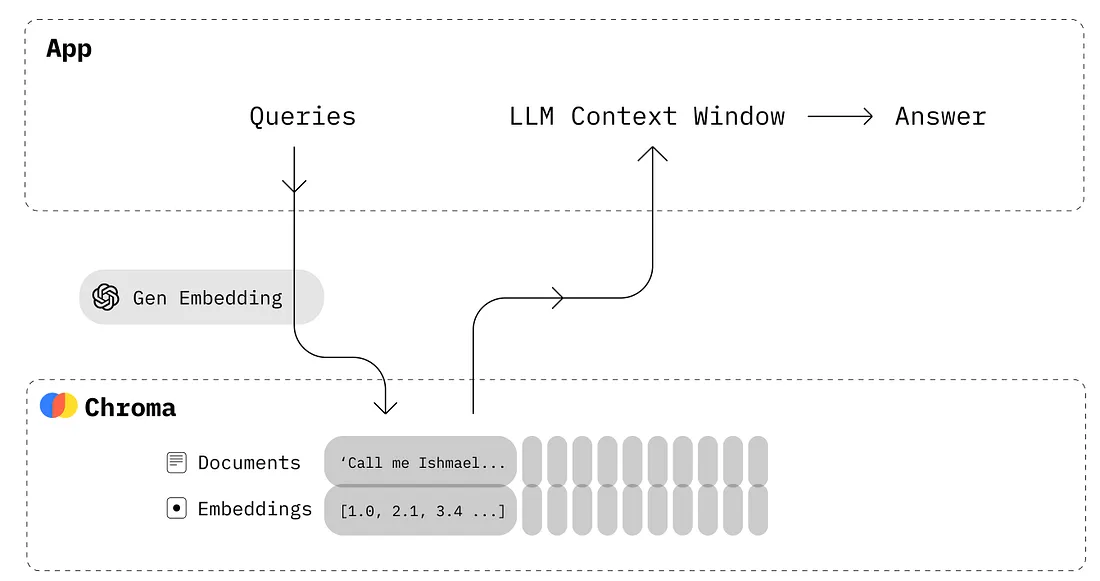

ChromaDB é um banco de dados vetorial de código aberto projetado para armazenar `Embeddings` de vetores para desenvolver e construir aplicativos de modelos de linguagem grandes. O banco de dados simplifica o armazenamento de conhecimentos, habilidades e fatos para aplicações LLM.

O diagrama acima mostra o funcionamento do `chromaDB` quando integrado a qualquer aplicativo `LLM`. O `ChromaDB` nos fornece uma ferramenta para executar as seguintes funções:

* Armazene `Embeddings` e seus `metadados` com ids.

* Incorporar documentos e queries

* Pesquisar Embeddings

O `ChromaDB` é super simples de usar e configurar com qualquer aplicativo desenvolvido com `LLM`. Ele foi projetado para aumentar a produtividade do desenvolvedor, tornando-o uma ferramenta amigável ao desenvolvedor.

Agora, vamos instalar o `ChromaDB` nos ambientes `Python` e `Javascript`. Ele também pode ser executado no `Jupyter Notebook`, permitindo que cientistas de dados e engenheiros de aprendizado de máquina experimentem modelos LLM.


`Javascript Installation:`
```
npm install --save chromadb # yarn add chromadb
```

In [ ]:
#%pip install chromadb

# <font color="red">Funções e funcionamento do ChromaDB</font>

<font color="orange">Podemos usar um ambiente `Jupyter Notebook` como o `Google Colab` para fins de demonstração. Você pode fazer os seguintes exercícios práticos em um ambiente de notebook Google Colab, Kaggle ou Local.</font>

## Criando coleção ChromaDB

<font color="orange">No código abaixo, instanciamos o objeto cliente para criar a coleção “my-collection” na pasta do repositório.

A coleção é onde os `Embeddings`, documentos e quaisquer `metadados` adicionais são armazenados para consultas (query) posterior em vários aplicativos.</font>

In [1]:
# Importe o chromadb e crie o cliente:
import chromadb

client = chromadb.Client()
collection = client.create_collection("Eddy_collection")


## Adicionar documentos à coleção

<font color="orange">Agora, adicionamos alguns documentos de amostra junto com metadados e IDs para armazená-los de maneira `estruturada`.

O `ChromaDB` armazenará os documentos de texto e tratará da `tokenização`, `vetorização` e `indexação` **automaticamente**, sem quaisquer comandos extras.</font>

In [ ]:
# Adicione os documentos no DB:
collection.add(
    documents=["Eu gosto muito de jogar futebol.", "Amo estudar Física e Ciência de Dados.", "A Intelgência Artificial mudou a maneira de olhar ao Mundo."],
    metadatas=[{"categoria": "sport"}, {"categoria": "estudo"}, {"categoria": "Intelgência Artificial"}],
    ids=["id1", "id2","id3"]
)


## Query ao DB da coleção

In [ ]:
# Peça à consulta para recuperar os dados do DB:
results = collection.query(query_texts=["Amanhã vou jogar futebol."],
                           n_results=1
                          )

results

# No nosso exemplo, a consulta retorna um texto semelhante contendo metadados de 'sport'.

# <font color="pink">🤗🤗🤗 Aplicativo de pesquisa semântica com documentos de amostra 🤗🤗🤗</font>

<font color="orange">A `pesquisa semântica` é uma das aplicações mais populares na indústria de tecnologia e é usada em `pesquisas na web pelo Google`, `Baidu`, etc. Os modelos de linguagem agora permitem o desenvolvimento de tais aplicações em nível individual ou para uma organização empresarial com `Embeddings` de uma grande quantidade De dados.

Nós usaremos a pasta `data` (o artigo usou `“pets”`) com alguns documentos de amostra para contornar o aplicativo de pesquisa semântica no `ChromaDB`.</font>

In [2]:
# import files from the pets folder to store in VectorDB
import os

def read_files_from_folder(folder_path):
    file_data = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            with open(os.path.join(folder_path, file_name), 'r') as file:
                content = file.read()
                file_data.append({"file_name": file_name, "content": content})

    return file_data

In [3]:
folder_path = "../1_Build_Semantic_Search_ChromaDB/data"

file_data = read_files_from_folder(folder_path)


<font color="orange">A função anterior pega a pasta `data` e os anexa em `“file_data”` como uma lista de todos os arquivos. usaremos esses arquivos para armazenar no `ChromaDB` como `embeddings` para fins de consulta.</font>

In [4]:
file_data

[{'file_name': 'Nutrition_Needs_of_Pet_Animals.txt',
  'content': 'A nutrição adequada é vital para a saúde e o bem-estar dos animais de estimação. \nCães e gatos necessitam de uma dieta balanceada que inclua proteínas, carboidratos \ne gorduras. Alguns podem até ter necessidades dietéticas específicas com base na \nraça ou idade. Os pássaros normalmente prosperam com uma dieta de sementes, frutas \ne vegetais, enquanto os répteis têm dietas diversas que variam de insetos vivos a \nprodutos frescos. A dieta dos peixes depende muito da espécie, sendo que alguns \nnecessitam de alimento vivo e outros subsistem de flocos ou pellets.'},
 {'file_name': 'The_Emotional_Bond_Between_Humans_and_Pets.txt',
  'content': 'Os animais de estimação oferecem mais do que apenas companhia; \neles fornecem apoio emocional, reduzem o estresse e podem até ajudar seus \nproprietários a levar uma vida mais saudável. O vínculo entre animais de estimação \ne seus donos é forte e muitas pessoas consideram seus 

<font color="pink">O código abaixo pega arquivos e metadados da lista de arquivos e os adiciona à `coleção chromaDB` chamada `“Eddy_pet_collection”`.

Aqui precisamos observar que, por padrão, o chromadb usa o modelo de `Embeddings` [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) (mapeia frases e parágrafos para um espaço vetorial denso de `384` dimensões) de `Trnasformers sentence` que converte documentos de texto em vetores. Agora, vamos consultar a coleção para ver os resultados.</font>

In [5]:
# Obtenha os dados de file_data e crie a coleção chromadb:
documents = []
metadatas = []
ids = []

for index, data in enumerate(file_data):
    documents.append(data['content'])
    metadatas.append({'source': data['file_name']})
    ids.append(str(index + 1))

# Criar coleção de arquivos de animais de estimação:
Eddy_pet_collection = client.create_collection("Eddy_pet_collection")

# Adicione arquivos à coleção do chromadb:
Eddy_pet_collection.add(
    documents=documents,
    metadatas=metadatas,
    ids=ids
)


In [6]:
# Consulte o DB para obter a resposta dos dados vetorizados:
results = Eddy_pet_collection.query(query_texts=["Quais são as necessidades nutricionais dos animais de estimação?"],
                                    n_results=1
                                   )


results


{'ids': [['5']],
 'distances': [[0.6450216174125671]],
 'metadatas': [[{'source': 'Training_and_Behaviour_of_Pets.txt'}]],
 'embeddings': None,
 'documents': [['O treinamento é essencial para uma vida harmoniosa com os animais \nde estimação, principalmente com os cães. Ajuda os animais de estimação \na compreenderem os seus limites e facilita a coabitação tanto para os \nanimais de estimação como para os proprietários. O treinamento deve ser \nbaseado em reforço positivo. Compreender o comportamento do animal de \nestimação também é importante, pois muitas vezes as mudanças de comportamento \npodem ser um sinal de problemas de saúde subjacentes.']]}

<font color="orange">À medida que consultamos a coleção, ela encontra automaticamente o documento mais semelhante para a nossa consulta a partir dos documentos incorporados que resultaram em uma saída. também podemos ver a métrica de distância na saída, que mostra o quão próximo determinado documento estava de nossa consulta.</font>

## <font coor="pink">Usando diferentes modelos de `Embeddings`</font>

<font color="orange">Até agora usamos o modelo de Embeddings padrão para a vetorização de textos de entrada, mas o `ChromaDB` também permite vários outros modelos da biblioteca do `Transformers` de frases. usaremos o modelo [paraphrase-MiniLM-L3-v2](https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L3-v2) para incorporar o mesmo documento de animais de estimação em nosso aplicativo de pesquisa semântica.</font>

In [5]:
# Importar a sentence Transformers:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')

documents = []
embeddings = []
metadatas = []
ids = []

for index, data in enumerate(file_data):
    documents.append(data['content'])
    embedding = model.encode(data['content']).tolist()
    embeddings.append(embedding)
    metadatas.append({'source': data['file_name']})
    ids.append(str(index + 1))

# Crie o novo chromaDB e use embeddings para adicionar e consultar dados:
Eddy_pet_collection_emb = client.create_collection("Eddy_pet_collection_emb")

# adicione os arquivos de animais de estimação ao banco de dados pet_collection_emb
Eddy_pet_collection_emb.add(
    documents=documents,
    embeddings=embeddings,
    metadatas=metadatas,
    ids=ids
)


O código acima usa o modelo `“paráfrase-MiniLM-L3-v2”` para codificar os arquivos de entrada ao adicioná-los à nova coleção.

Agora, podemos consultar o banco de dados novamente para obter resultados `mais semelhantes`.

In [6]:
# Escreva a query de texto e envie para a coleção:
query = "Quais são as necessidades nutricionais dos animais de estimação?" # Quais são os diferentes tipos de animais de estimação que as pessoas normalmente possuem?
input_em = model.encode(query).tolist()

results = Eddy_pet_collection_emb.query(query_embeddings=[input_em],
                                        n_results=1
                                       )

results

# Efetivamente verificamos que a recuperação do modelo melhorou. 


{'ids': [['1']],
 'distances': [[12.622246742248535]],
 'metadatas': [[{'source': 'Nutrition_Needs_of_Pet_Animals.txt'}]],
 'embeddings': None,
 'documents': [['A nutrição adequada é vital para a saúde e o bem-estar dos animais de estimação. \nCães e gatos necessitam de uma dieta balanceada que inclua proteínas, carboidratos \ne gorduras. Alguns podem até ter necessidades dietéticas específicas com base na \nraça ou idade. Os pássaros normalmente prosperam com uma dieta de sementes, frutas \ne vegetais, enquanto os répteis têm dietas diversas que variam de insetos vivos a \nprodutos frescos. A dieta dos peixes depende muito da espécie, sendo que alguns \nnecessitam de alimento vivo e outros subsistem de flocos ou pellets.']]}

## <font coor="pink">`Embeddings` suportadas no ChromaDB</font>

<font color="orange">`Embeddings` são a forma nativa de armazenar todos os tipos de dados para aplicativos de `IA`. Eles podem representar dados de `texto`, `imagens`, `áudio` e `vídeo` de acordo com os requisitos dos aplicativos.

O `ChromaDB` oferece suporte a muitos modelos de `IA` de diferentes provedores de Embeddings, como `OpenAI`, `Sentence Transformers`, `Cohere` e `Google PaLM API`. Vejamos alguns deles aqui.</font>

### <font color="red">Embeddings `Sentence transformer`</font>

```
# Carregando qualquer modelo da biblioteca do Sentence Transformers:
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")
```

Usando o código acima podemos usar qualquer modelo.

### <font color="red">Modelos `OpenAI`</font>

`ChromaDB` fornece uma função wrapper para usar qualquer `API de modelo de Embeddings da OpenAI` para aplicativos de IA.

```
# function to call OpenAI embeddings
openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key="YOUR_API_KEY",
                model_name="text-embedding-ada-002"
            )
```

# <font color="pink">Perguntas frequentes</font>

Q1: <font color="red">Para que é usado o chroma DB?</font>

R1: `ChromaDB` é um banco de dados de código aberto nativo de IA projetado para ser usado em aplicativos de base `LLM` para tornar conhecimento e habilidades conectáveis ​​para LLMs.


Q2: <font color="red">O chromaDB é gratuito?</font>

R2: Sim, o `ChromaDB` é gratuito para uso para qualquer finalidade pessoal ou comercial sob a licença Apache 2.0.


Q3: <font color="red">O chroma db está na memória?</font>

R3: O `ChromaDB` é flexível por natureza. Ele funciona tanto para configuração na memória quanto para configuração incorporada (embedded) para qualquer aplicativo baseado em LLM.


Q4: <font color="red">Qual é a diferença entre `ChromaDB` e `LangChain`?</font>

R4: ChromaDB é um banco de dados vetorial que armazena os dados em um formato Embedding, enquanto `LangChain` é uma estrutura para carregar grandes quantidades de dados para qualquer caso de uso.


Q5: <font color="red">Quais são os embeddings suportados pelo ChromaDB?</font>

R5: O `ChromaDB` oferece suporte a modelos de `sentence transformers`, APIs OpenAI e `Cohere` ou qualquer outro modelo de sistema operacional (SO) para armazenar embeddings.